<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#About-the-data" data-toc-modified-id="About-the-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>About the data</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Matrix-form" data-toc-modified-id="Matrix-form-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Matrix form</a></span></li></ul></li><li><span><a href="#Aux-functions" data-toc-modified-id="Aux-functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aux functions</a></span></li><li><span><a href="#User-recommendations" data-toc-modified-id="User-recommendations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>User recommendations</a></span><ul class="toc-item"><li><span><a href="#Product-similarity-based-recommendations" data-toc-modified-id="Product-similarity-based-recommendations-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Product similarity based recommendations</a></span><ul class="toc-item"><li><span><a href="#Distances" data-toc-modified-id="Distances-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Distances</a></span></li><li><span><a href="#Rules-for-similarity-based-recommendations" data-toc-modified-id="Rules-for-similarity-based-recommendations-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Rules for similarity based recommendations</a></span></li><li><span><a href="#Example-1" data-toc-modified-id="Example-1-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Example 1</a></span></li></ul></li><li><span><a href="#User-similarity-based-recommendations" data-toc-modified-id="User-similarity-based-recommendations-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>User similarity based recommendations</a></span></li></ul></li><li><span><a href="#Collaborative-Filtering" data-toc-modified-id="Collaborative-Filtering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Collaborative Filtering</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Simple-Gradient-Descent" data-toc-modified-id="Simple-Gradient-Descent-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Simple Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Initialize" data-toc-modified-id="Initialize-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Initialize</a></span></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Gradient Descent</a></span></li></ul></li><li><span><a href="#Regularisation" data-toc-modified-id="Regularisation-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Regularisation</a></span></li><li><span><a href="#Stochastic-GD" data-toc-modified-id="Stochastic-GD-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Stochastic GD</a></span></li><li><span><a href="#Finidng-user/product-clusters" data-toc-modified-id="Finidng-user/product-clusters-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Finidng user/product clusters</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Recommendations</a></span></li></ul></li></ul></div>

# Background
This is based on ideas from this [post](http://www.albertauyeung.com/post/python-matrix-factorization/), but takes a more simple, script-like approach

# Setup

Data & Algebra libs

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances

Graphic libs

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.cluster import hierarchy

# Data

## About the data
You can find everything you need to know about the MovieLens dataset [here](http://files.grouplens.org/datasets/movielens/ml-100k/README)

## Read data

In [3]:
ml = \
pd.read_csv(
    filepath_or_buffer = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.data',
    header = None,
    sep = '\t'
)

In [4]:
ml.columns = 'user id | item id | rating | timestamp'.split(' | ')

For offline usage

In [5]:
# ml.to_feather('movie_rec.feather')
# ml = pd.read_feather('movie_rec.feather')

Our dataset at a glance

In [6]:
ml.shape

(100000, 4)

In [7]:
ml.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
ml.describe()

,user id,item id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


## Matrix form

In [9]:
data_mat = \
ml.drop(columns=['timestamp']).\
    pivot(
        index = 'user id', 
        columns = 'item id', 
        values = 'rating'
    ).\
    fillna(0)

# Aux functions

In [10]:
def vis_dist_mat(dist, bins = 30):
    '''Visualize different aspects of a distance matrix
    
    :param dist: a distance matrix calculated by `pairwise_distances`
    
    :Example:
    >>> vis_dist_mat(dist)
    '''
    
    dist_vec = \
    pd.Series(
        dist[
            np.tril_indices(dist.shape[0], k=1)
        ]
    )
    
    print('Distance Matrix Details\n=======================\n')
    
    print(
        '* have have',
        (dist_vec == 0).sum(),
        'identical items (with distance = 0), and',
        (dist_vec == 1).sum(),
        'with no common ratings (distance = 1)\n'
    )
    print('* Percentiles:')
    print(dist_vec.describe(), '\n')
    
    sns.distplot(
        dist_vec,
        bins = bins,
        kde = False,
        norm_hist = False,
    ).\
    set_title('Distance distribution')
    
    plt.figure()

    dn = hierarchy.dendrogram(hierarchy.ward(dist))
    plt.xticks([])
    plt.title('Cluster dendogram')

    plt.show()
    
    return None

# User recommendations

## Product similarity based recommendations
This approach looks at all the products recommended by the users and try to find "similar" products based on some simple rules.

### Distances

In [11]:
product_dist = pairwise_distances(X = data_mat.T, metric = 'cosine')

Distance Matrix Details

* have have 2392 identical products (with distance = 0), and 430641 with no common ratings (distance = 1)

* Percentiles:
count    1.417084e+06
mean     9.129765e-01
std      1.089063e-01
min      0.000000e+00
25%      8.696132e-01
50%      9.451297e-01
75%      1.000000e+00
max      1.000000e+00
dtype: float64 



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


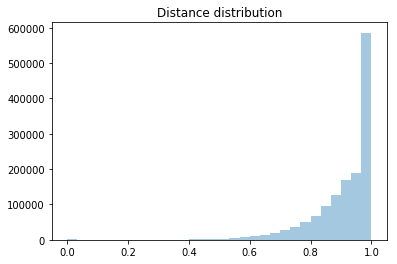

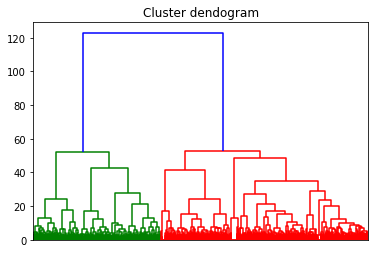

In [12]:
vis_dist_mat(product_dist)

### Rules for similarity based recommendations

There are several strategies for picking the products we want to recommend based on product similarity, but essentially we need to make several choices
1. What products we look at: all the products the user rated? Only producs with $n$ stars or more? Or do we weights the distances by the number of stars? And even with weights - do 1 star reviews have a positive weight or shoud we give a low number of stars a negative weight? 
2. How do we aggregate the distances? Say the user only rated 2 products, and both of them are similar to product $j$. Do we rank product $j$ compared to all the other producuts that have some similarity to the 2 rated products? Do we sum up distances for each product and rank? Do we take $min$/$max$/... distance for each product?
3. What would be the threshold for a product to be recommended? This is dependent on practical limitaions, e.g. what's the minimum/maximim number of products we have to/can recommend, and what is the distribution of distances and other considerations (e.g. do we want an absolute threshold of similarity and not just the top 5)

Looking at the second choice we have to make: there's one huge advantage to summing up distances over picking min/max or other aggregation methods - __we can use matrix multiplication!__

### Example 1
We decide to look at all the movies a user rated (no matter what the rating was) and sum up the similarities to other products, and recommend the top 5 most similar products (regardless of the absolute level of similarity - in this example we _have_ to recommend exactly 5 products, no matter what)

We define 
1. The symmetric matrix $P$ containing prodcut to product distances as we calculated above (our `product_dist` matrix based on `cosine` distance)
2. A matrix with binary values $C$

\begin{equation*}
    C_{I \times J} = \left[ 
        \begin{array}{lll}
            c_{1,1} & \ldots & c_{1,J} \\
            \vdots  & \ddots & \vdots  \\
            c_{J,1} & \ldots & c_{J,J}
        \end{array}
    \right]
\end{equation*}
where
\begin{equation*}
    c_{i,j} = 
    \left\{
        \begin{array}{ll}
          1 & R_{i,j} > 0 \\
          0 & \text{otherwise}
        \end{array}
    \right.
\end{equation*}

For every user $i$ we want to look at all rated products, and find the distances from other products. This can be written as a sparse matrix, where only rows matching rated products will have non-zero values:

\begin{equation*}
   M^{(i)}_{J \times J} =  \left[
        \begin{array}{lll}
            c_{i,1} p_{1,1} & \ldots & c_{i,1} p_{1,J} \\
            \vdots  & \ddots & \vdots  \\
            c_{i,J} p_{J,1} & \ldots & c_{i,J} p_{J,J}
        \end{array}
    \right]
\end{equation*}

And if our way to rank products is to sum up distances, we can sum up across columns, to get $\left( \sum_{k =1}^{J} C_{i,k} P_{k,1} , \ldots, \sum_{k=1}^{J}  C_{i,k} P_{k,J} \right)$, which is simply the $i$'th row of the matrix $CP$, which we can calculate as:

In [13]:
CP = (data_mat > 0).dot(product_dist)
CP.columns = data_mat.columns

For practical reasons we need to work with the long format, sorted by similarity.

In [14]:
user_rec = pd.DataFrame({'dist': CP.T.unstack()})

And now we can pull out only the top 5 most similar products (or apply any other selection rule)

In [15]:
user_rec.\
groupby(user_rec.index.get_level_values(0)).\
apply(
    lambda x: x.sort_values(by = 'dist').head(5).reset_index()
).head(15)

user id  item id        dist
user id                                
1       0        1      174  158.434889
        1        1      204  160.294931
        2        1      172  161.639726
        3        1       56  163.572312
        4        1      168  163.906063
2       0        2      100   38.733360
        1        2       50   39.366244
        2        2      258   39.502784
        3        2      286   39.739942
        4        2      237   39.763622
3       0        3      258   35.885474
        1        3      300   36.017368
        2        3      328   36.151322
        3        3      288   36.182247
        4        3      333   36.296311

## User similarity based recommendations

In [16]:
user_dist = pairwise_distances(X = data_mat, metric = 'cosine')

Distance Matrix Details

* have have 943 identical products (with distance = 0), and 15075 with no common ratings (distance = 1)

* Percentiles:
count    446038.000000
mean          0.826180
std           0.124427
min           0.000000
25%           0.753425
50%           0.848349
75%           0.920774
max           1.000000
dtype: float64 



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


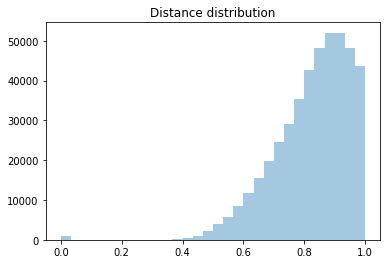

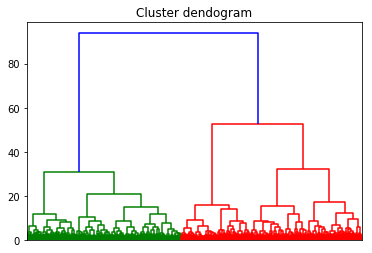

In [17]:
vis_dist_mat(user_dist)

For rach user we pick the top $n$ most similar users and select the products they liked most 

# Collaborative Filtering

## Parameters

In [18]:
K = 2
iterations = 1000
tolerance = 0.05
alpha = 0.0001

## Simple Gradient Descent

### Initialize

In [19]:
R = np.array(data_mat)
P = np.random.normal(scale=1./K, size=(R.shape[0], K))
Q = np.random.normal(scale=1./K, size=(K, R.shape[1]))

In [20]:
training_process = pd.DataFrame(columns=['iteration', 'mse'])
t = 1
mse_prev = 0
mse = 1e6

### Gradient Descent

In [21]:
while t <= iterations and abs(mse - mse_prev) > tolerance:
    mse_prev = mse
    
    ## Error matrix
    error = R - P.dot(Q)

    ## Update down the gradient
    P = P + 2 * alpha * error.dot(Q.T)
    Q = Q + 2 * alpha * P.T.dot(error)

    mse = np.power(error, 2).sum()
    training_process = training_process.append(pd.DataFrame({'iteration': [t], 'mse': [mse]}))

    if (t+1) % 50 == 0:
        print("Iteration: %d ; error = %.4f" % (t+1, mse))
    t += 1

Iteration: 50 ; error = 1006302.7625
Iteration: 100 ; error = 951273.0340
Iteration: 150 ; error = 911523.6362
Iteration: 200 ; error = 902978.0482
Iteration: 250 ; error = 902451.0279
Iteration: 300 ; error = 902387.9907
Iteration: 350 ; error = 902369.1001
Iteration: 400 ; error = 902360.1066
Iteration: 450 ; error = 902355.0907


In [22]:
training_process.set_index('iteration', inplace=True)

Text(0.5,1,'Algorithm progress')

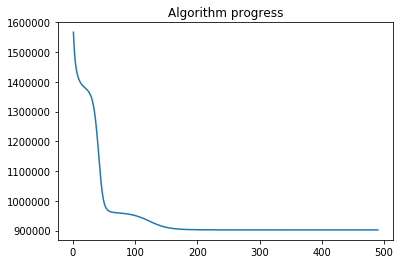

In [23]:
plt.figure()
plt.plot(training_process['mse'])
plt.title('Algorithm progress')

## Regularisation

TBD
* Add a penalty on $\sqrt{\sum q_{i,j}^2 + \sum p_{i,j}^2}$ ($L2$) or $\sum \left| q_{i,j} \right| + \sum \left| p_{i,j} \right| $ ($L1$) with a penalty coeff $\gamma$ on the MSE goal function and optimize $MSE - \lambda ()$ 
* This probably requires some form of normalisation of $P,Q$ prior to optimisation 

## Stochastic GD

TBD

## Finidng user/product clusters

Since we picked $K=2$ we can actually visualize our results 

Text(0.5,1,'Product dimensions')

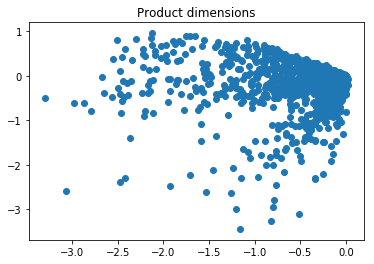

In [24]:
plt.figure()
plt.scatter(x = Q[0:1], y = Q[1:])
plt.title('Product dimensions')

Text(0.5,1,'User dimensions')

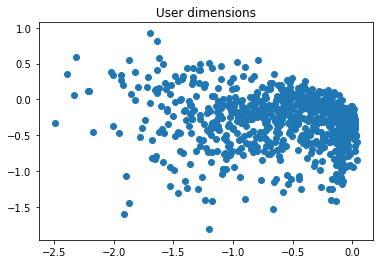

In [25]:
plt.figure()
plt.scatter(x = P.T[0:1], y = P.T[1:])
plt.title('User dimensions')

And of course the fact we do not see a good separation suggests we need to increase $K$. For higher dimensions we can use both clustering methods or more dimension reduction techniques (e.g. t-SNE) to try and find clusters of users. 

## Recommendations

We can now use the embedding matrices $P,Q$ to generate recommendations in a similar way to what we did before, excpet similarity of product or user is now defined by the euclidian distances defined by $Q$ or $P$ respectively.